In [1]:
import numpy as np
import pandas as pd

In [2]:
headers = ["T", "TV", "TS", "LV", "LS", "CE", "MV", "STDV", "MS", "STDS"]
df = pd.read_csv('averages_output.dat', delimiter='\t', header=None, names=headers)
df.head()

,T,TV,TS,LV,LS,CE,MV,STDV,MS,STDS
0,10.0,34.0,69.95,17.18,13.330,10.0,33.253613,0.592398,69.212756,0.975437
1,10.0,33.0,71.97,18.28,19.990,10.0,32.207193,0.513582,71.904697,0.424943
2,10.0,22.0,64.63,11.83,7.272,10.0,20.292467,0.661431,63.057148,1.005242
3,10.0,22.0,33.43,16.38,4.966,10.0,20.811712,0.558270,31.765078,0.925208
4,10.0,69.0,28.90,16.13,7.653,10.0,67.768782,0.544550,34.438612,0.713506


In [3]:
df.describe()

,T,TV,TS,LV,LS,CE,MV,STDV,MS,STDS
count,50000.0,50000.000000,50000.000000,50000.000000,50000.000000,50000.0,49979.000000,49979.000000,49979.000000,49979.000000
mean,10.0,54.936120,43.972505,10.445386,10.517303,10.0,52.503898,0.763436,46.463727,0.594298
std,0.0,26.008383,20.753659,5.483080,5.486390,0.0,26.458504,0.380722,16.477843,0.452810
min,10.0,10.000000,8.001000,1.000000,1.000000,10.0,1.022512,0.000000,4.087509,0.000000
25%,10.0,32.000000,26.050000,5.705750,5.755750,10.0,29.565193,0.552814,34.073591,0.193463
50%,10.0,55.000000,43.875000,10.430000,10.540000,10.0,52.314191,0.657848,42.724082,0.587255
75%,10.0,78.000000,61.910000,15.200000,15.280000,10.0,75.412276,0.875342,60.014915,0.928720
max,10.0,100.000000,80.000000,20.000000,20.000000,10.0,99.609517,8.083125,79.914573,4.427659


In [4]:
count = (df.isna()).any(axis=1).sum()
print(count)

21


In [5]:
df = df.fillna(0)

In [6]:
count = (df.isna()).any(axis=1).sum()
print(count)

0


In [7]:
def plot(dataset, x='', y=''):
    dataset.plot(x=x, y=y, kind='scatter', s=1)
    return()

In [8]:
df_TS = df[(df['TS']>8) & (df['TS']<25)]
df_TS.describe()

,T,TV,TS,LV,LS,CE,MV,STDV,MS,STDS
count,11737.0,11737.000000,11737.000000,11737.000000,11737.000000,11737.0,11737.000000,11737.000000,11737.000000,11737.000000
mean,10.0,54.943597,16.498549,10.433973,10.528452,10.0,50.981636,0.747848,29.138867,0.305732
std,0.0,26.112706,4.891108,5.498925,5.470105,0.0,27.404857,0.395270,8.275556,0.364875
min,10.0,10.000000,8.001000,1.001000,1.000000,10.0,0.000000,0.000000,0.000000,0.000000
25%,10.0,32.000000,12.270000,5.617000,5.766000,10.0,27.642169,0.535446,22.575239,0.000000
50%,10.0,55.000000,16.520000,10.510000,10.600000,10.0,51.357285,0.640717,30.000000,0.144985
75%,10.0,78.000000,20.730000,15.270000,15.230000,10.0,74.717028,0.848293,36.070366,0.603816
max,10.0,100.000000,24.990000,20.000000,20.000000,10.0,98.178557,8.083125,42.000000,4.427659


In [52]:
df_filter_LVLSCE50 =  df[(df['LV']>5) & (df['LV']<15)]
df_filter_4sqrtTV50 = df[(df['TS']> 4*np.sqrt(df['TV'])*0.5) & (df['TS']< 4*np.sqrt(df['TV'])*1.5)]
df_filter_both = df[(df['LV']>5) & (df['LV']<15) & (df['TS']> 4*np.sqrt(df['TV'])*0.5) & (df['TS']< 4*np.sqrt(df['TV'])*1.5)]
print(len(df), len(df_filter_both))

50000 10448


()

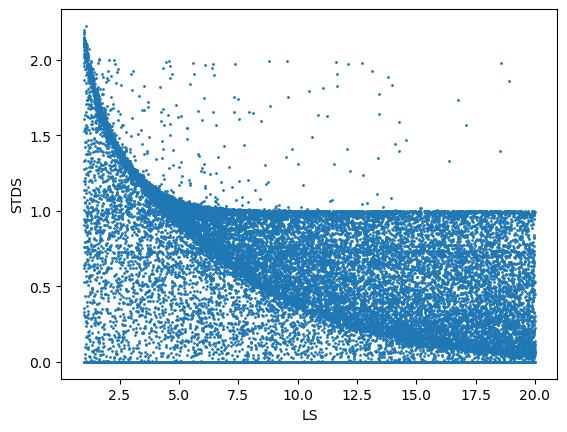

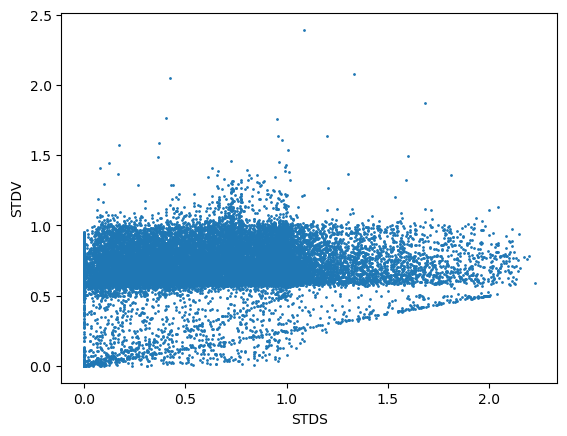

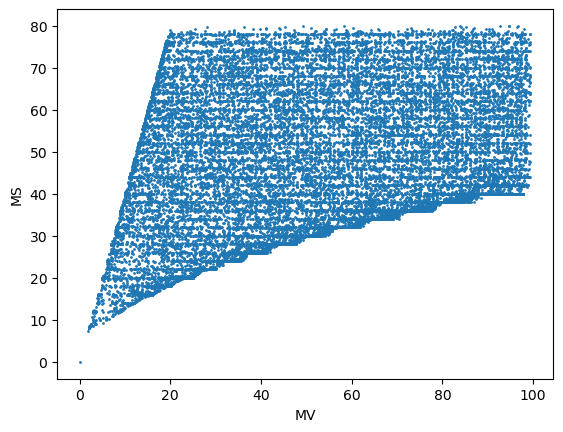

In [48]:
plot(df_filter_LVLSCE50, x='LS', y='STDS')
plot(df_filter_LVLSCE50, x='STDS', y='STDV')
plot(df_filter_LVLSCE50, x='MV', y='MS')

()

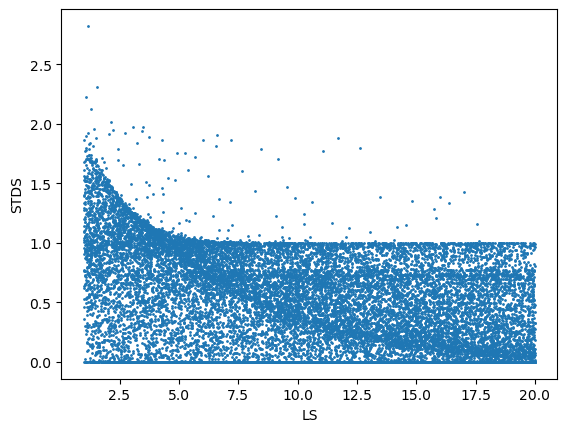

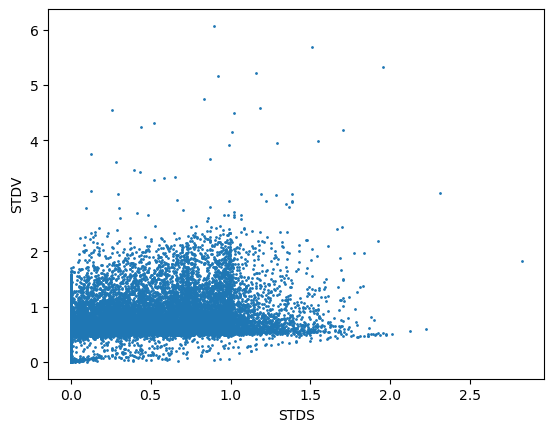

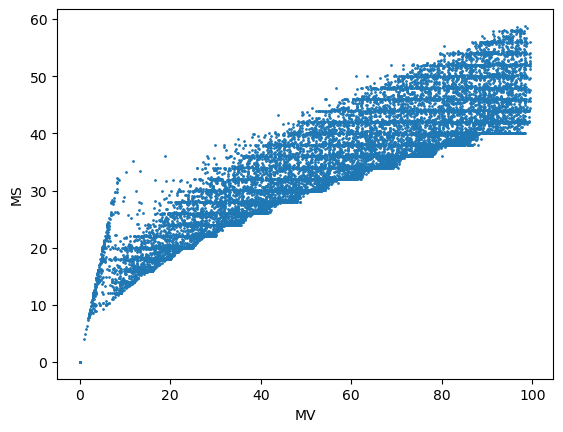

In [49]:
plot(df_filter_4sqrtTV50, x='LS', y='STDS')
plot(df_filter_4sqrtTV50, x='STDS', y='STDV')
plot(df_filter_4sqrtTV50, x='MV', y='MS')

()

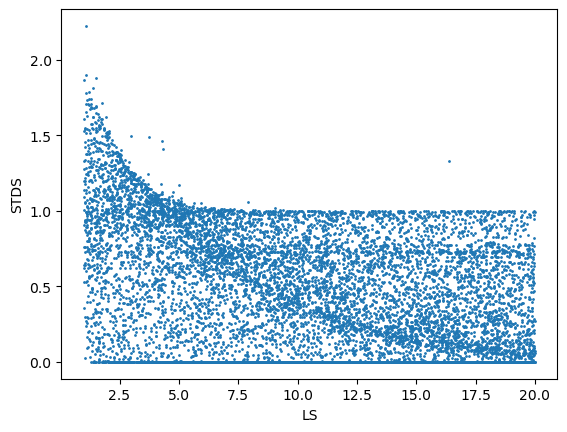

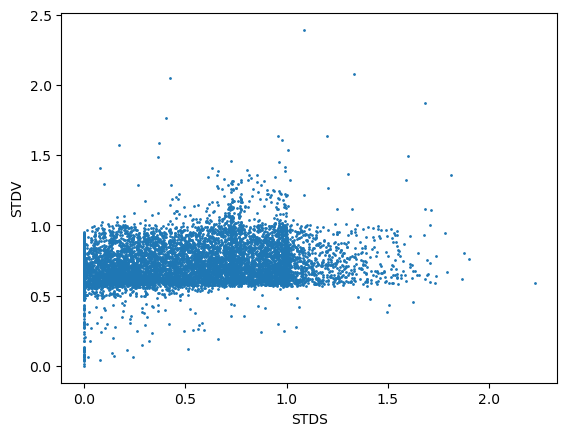

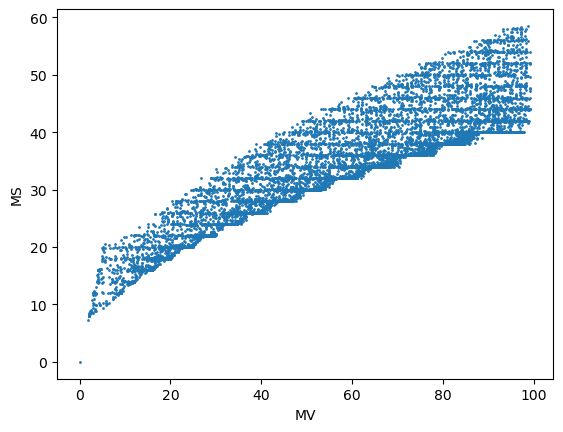

In [50]:
plot(df_filter_both, x='LS', y='STDS')
plot(df_filter_both, x='STDS', y='STDV')
plot(df_filter_both, x='MV', y='MS')

In [27]:
df_outliers = df[(df['STDS']>1.3) & (df['STDS']<2.0) & (df['LS']>15.0)]
print(df_outliers)

          T    TV      TS      LV     LS    CE         MV      STDV  \
8121   10.0  13.0  72.250  17.580  17.59  10.0  17.811542  0.391035   
12928  10.0  12.0  67.480  10.270  18.54  10.0  16.204686  0.403393   
13140  10.0  16.0  75.640  18.030  17.31  10.0  18.388222  0.487282   
13857  10.0  27.0   8.382   2.739  16.05  10.0   3.159688  2.943449   
13998  10.0  28.0   8.056   2.700  17.36  10.0   4.037095  2.426039   
16028  10.0  12.0  10.980   2.191  17.02  10.0   2.712256  0.452651   
17133  10.0  25.0   9.831   3.922  18.75  10.0  12.066391  2.400626   
17600  10.0  10.0  77.240  19.590  17.72  10.0  18.140518  0.347459   
20399  10.0  22.0  10.470   5.291  16.37  10.0  11.535248  2.081209   
20618  10.0  12.0  67.690  10.210  16.75  10.0  16.288410  0.452950   
26351  10.0  44.0  15.850   1.690  16.01  10.0  25.250912  2.900036   
31279  10.0  16.0  79.700  15.230  19.43  10.0  19.812559  0.390221   
31453  10.0  33.0   8.173   2.408  18.52  10.0  12.173366  3.131805   
38664 

In [26]:
df_outliers = df[df['STDS']>2.5]
print(df_outliers)

          T    TV      TS     LV      LS    CE         MV      STDV  \
879    10.0  54.0   8.182  1.001   2.881  10.0  21.683684  5.982795   
1976   10.0  28.0  17.710  1.963   1.189  10.0   2.745746  1.815686   
3390   10.0  53.0   8.152  1.080  10.940  10.0  16.915617  8.083125   
7050   10.0  29.0   9.088  2.503   3.139  10.0   6.412786  5.032267   
16657  10.0  46.0  10.790  1.207   4.920  10.0   6.079337  5.541904   
25250  10.0  44.0   9.505  1.350   4.756  10.0   6.571496  5.792348   
28698  10.0  44.0   8.159  1.365  15.330  10.0  12.603738  7.416617   
28802  10.0  42.0   8.295  1.521   8.493  10.0  17.504323  5.337912   
35965  10.0  40.0   9.780  1.573   6.905  10.0   9.569614  5.580237   

              MS      STDS  
879    19.447447  3.042408  
1976    9.879880  2.821621  
3390   16.456405  4.427659  
7050   10.588753  3.416198  
16657  10.596548  3.372605  
25250  10.752325  3.497431  
28698  14.305613  4.333621  
28802  17.160870  2.956017  
35965  12.610962  3.331041  

()

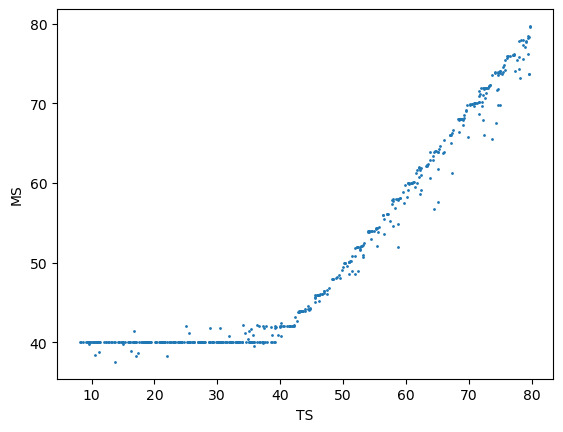

In [9]:
df_TS = df[(df['TV']>96) & (df['TV']<98)]
df_TS.describe()
plot(df_TS, x='TS', y='MS')

()

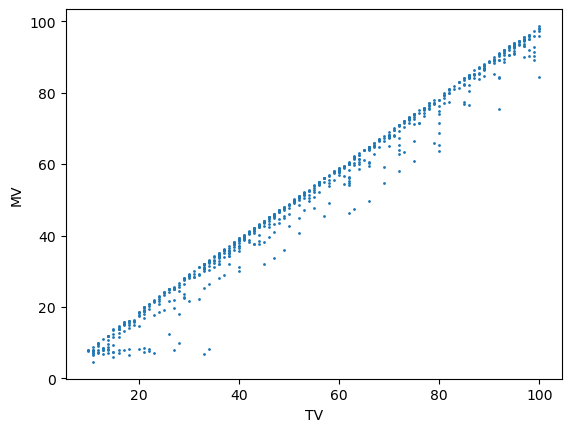

In [10]:
df_TS = df[(df['TS']>30) & (df['TS']<31)]
plot(df_TS, x='TV', y='MV')

()

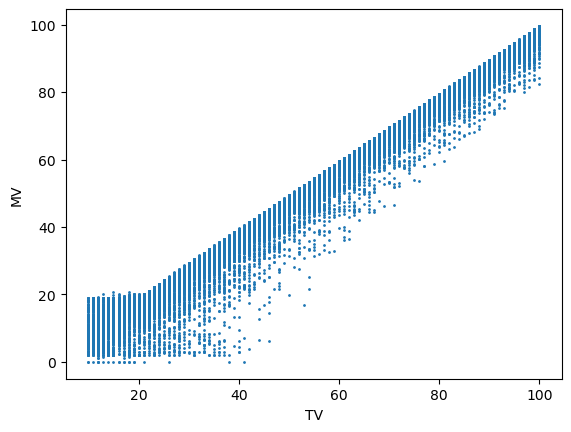

In [14]:
plot(df, x='TV', y='MV')

()

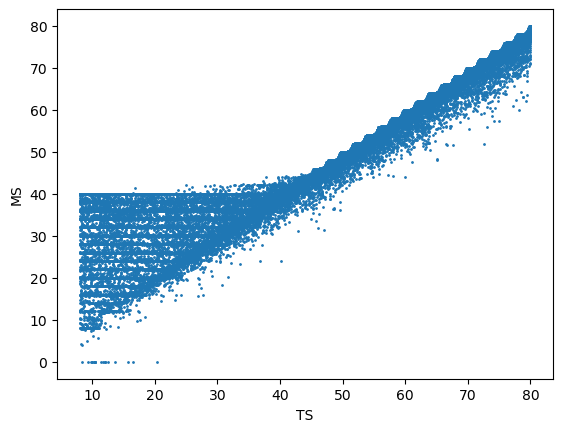

In [15]:
plot(df, x='TS', y='MS')

()

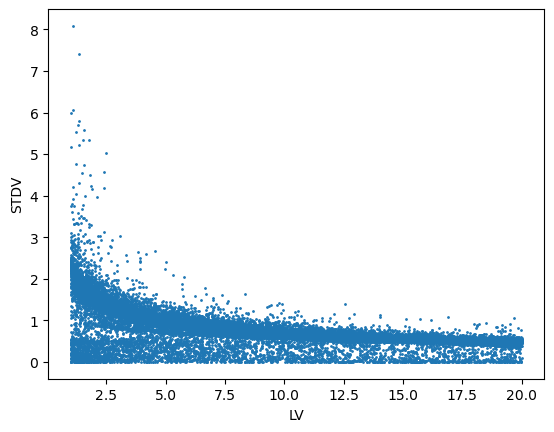

In [16]:
plot(df, x='LV', y='STDV')

()

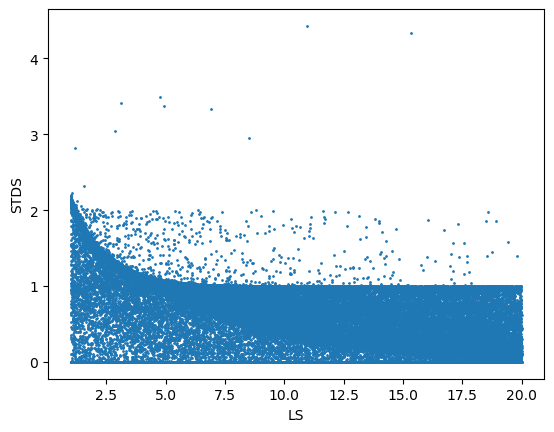

In [17]:
plot(df, x='LS', y='STDS')

()

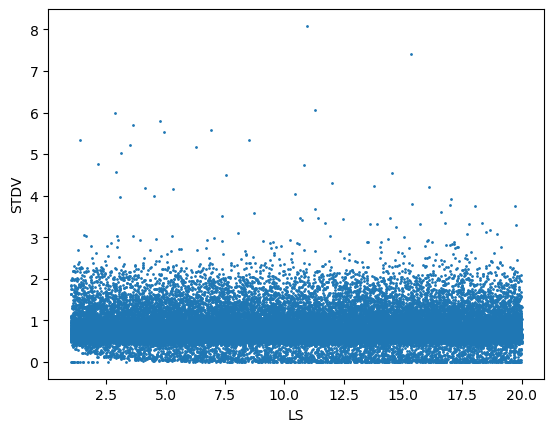

In [18]:
plot(df, x='LS', y='STDV')

()

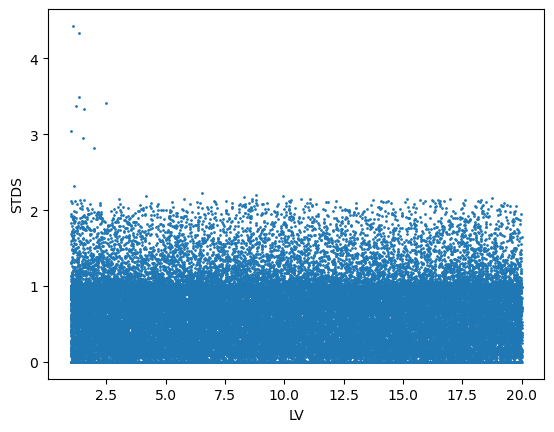

In [19]:
plot(df, x='LV', y='STDS')

()

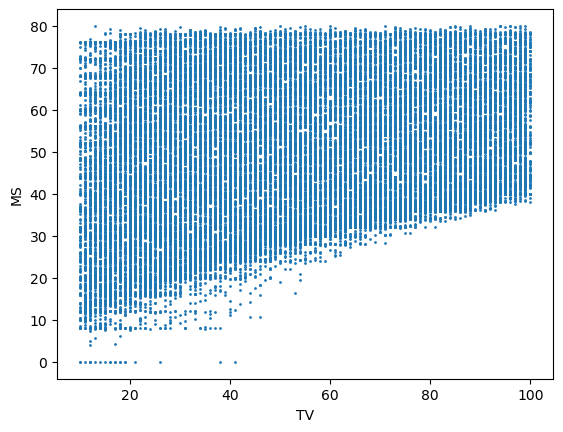

In [20]:
plot(df, x='TV', y='MS')

()

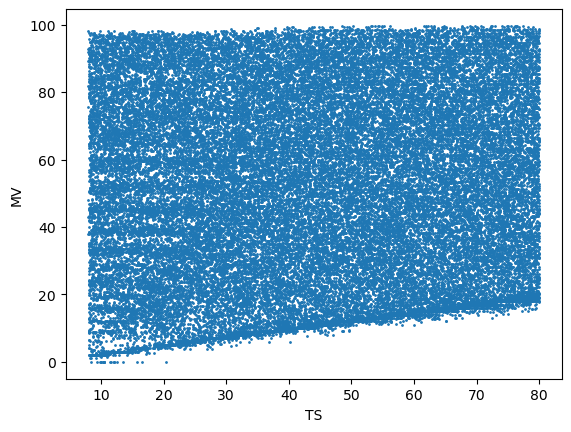

In [21]:
plot(df, x='TS', y='MV')

()

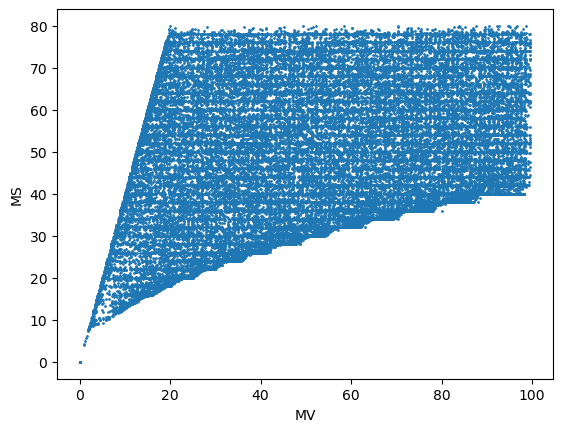

In [22]:
plot(df, x='MV', y='MS')

()

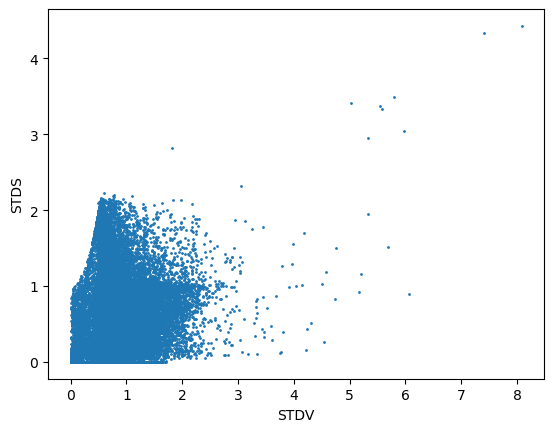

In [23]:
plot(df, x='STDV', y='STDS')